# Startegi : Using each tagret one by one

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor

In [2]:
path='data/train.csv'

In [3]:
df=pd.read_csv(path, index_col=0)
df=df[['x','y','z','x_sim','y_sim','z_sim']]
# df=df.drop('epoch', axis=1)
df.head()

,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
0,-8855.823863,13117.780146,-20728.353233,-8843.131454,13138.221690,-20741.615306
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556
2,-10578.684043,-10180.467460,-24238.280949,-10571.858472,-10145.939908,-24271.169776
3,-9148.251857,-20651.437460,-20720.381279,-9149.620794,-20618.200201,-20765.019094
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986


In [4]:
mydata=df.copy()

In [5]:
mydata.isna().sum()

x        0
y        0
z        0
x_sim    0
y_sim    0
z_sim    0
dtype: int64

In [6]:
mydata = mydata.dropna()
mydata.shape

(649912, 6)

In [7]:
train_mydata = mydata.sample(frac=0.8,random_state=0)
test_mydata = mydata.drop(train_mydata.index)
test_mydata.head()

,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411


In [8]:
#a=train_mydata.shape
#b=test_mydata.shape
#print(a,b)
print(train_mydata.shape, test_mydata.shape)
train_mydata.head()

(519930, 6) (129982, 6)


,x,y,z,x_sim,y_sim,z_sim
id,,,,,,
162906,-22445.306373,5848.139687,805.906588,-21786.206588,7375.036638,391.178832
123662,-9086.781838,7654.307240,-6721.299832,-9545.479053,7482.025507,-6387.708079
901720,-33475.100342,-37591.455624,-3269.507831,-33263.131053,-37783.198553,-3617.165346
308669,11617.034853,2343.826977,-1821.565305,10718.558812,5174.769686,-1069.308627
1154759,25113.931453,-473.679010,41867.498593,19229.123354,12147.342145,31835.248429


In [9]:
label=['Vx','Vy','Vz','x','y','z'][3:]
train_stats = train_mydata.describe()
for i in label:
  train_stats.pop(i)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
x_sim,519930.0,-941.331006,25387.037253,-255037.952966,-13139.771199,-612.877803,11194.372299,200961.158000
y_sim,519930.0,319.853163,25603.245579,-281784.430040,-11758.892200,501.609913,12558.620911,209619.553857
z_sim,519930.0,-77.075471,20670.833347,-180250.922287,-7963.461284,57.093264,8253.028193,198526.091552


In [10]:
train_labels = train_mydata[label]
test_labels = test_mydata[label]

In [11]:
print(train_labels.head())
print(test_labels.head())

                    x             y             z
id                                               
162906  -22445.306373   5848.139687    805.906588
123662   -9086.781838   7654.307240  -6721.299832
901720  -33475.100342 -37591.455624  -3269.507831
308669   11617.034853   2343.826977  -1821.565305
1154759  25113.931453   -473.679010  41867.498593
               x             y             z
id                                          
1  -10567.672384   1619.746066 -24451.813271
4   -6719.092336 -28929.061629 -14938.907967
15  17281.246143  -2011.121378  39970.739873
22  -1447.724638  28032.228987  -3918.192838
26 -10583.521489 -10145.003880 -24243.775722


In [12]:
def norm(x):
  try:
    return (x - train_stats['mean']) / train_stats['std']
  except:
    print(x)

In [13]:
normed_train_data = norm(train_mydata.drop(label, axis=1))
normed_test_data = norm(test_mydata.drop(label, axis=1))

In [14]:
a=normed_test_data.describe()
a.transpose()

,count,mean,std,min,25%,50%,75%,max
x_sim,129982.0,-0.001650,0.997447,-10.002493,-0.483600,0.011332,0.477304,7.940276
y_sim,129982.0,0.000919,1.000829,-11.059974,-0.467484,0.011119,0.476295,8.154777
z_sim,129982.0,-0.000651,0.999315,-8.628536,-0.380103,0.006436,0.399140,9.581585


In [15]:
for i in label:
    reg = XGBRegressor()
    reg.fit(normed_train_data, train_labels[i])
    print('score for label train %s : %f'%(i,reg.score(normed_train_data, train_labels[i])))
    print('score for label test %s : %f'%(i,reg.score(normed_test_data, test_labels[i])))
    y_train_pred=reg.predict(normed_train_data)
    y_test_pred=reg.predict(normed_test_data)
    train_mydata[i+'_pred']=y_train_pred
    test_mydata[i+'_pred']=y_test_pred

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:30:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score for label train x : 0.925451
score for label test x : 0.925855


/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:30:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score for label train y : 0.925715
score for label test y : 0.924917


/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[02:31:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score for label train z : 0.922098
score for label test z : 0.924026


In [17]:
test_mydata['index']=[i for i in range(len(test_mydata))]
test_mydata.head()

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556,-9179.145508,2141.341309,-23610.376953,0
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986,-5515.943359,-26971.740234,-14579.615234,1
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155,16667.380859,-2269.352051,37176.863281,2
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549,-1289.227295,27842.541016,-2920.511963,3
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411,-9233.385742,-7560.209473,-23610.376953,4


In [18]:
train_mydata['index']=[i for i in range(len(train_mydata))]
train_mydata.head()

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
162906,-22445.306373,5848.139687,805.906588,-21786.206588,7375.036638,391.178832,-20874.291016,5931.702148,240.171539,0
123662,-9086.781838,7654.307240,-6721.299832,-9545.479053,7482.025507,-6387.708079,-7802.129395,6277.270508,-6097.945312,1
901720,-33475.100342,-37591.455624,-3269.507831,-33263.131053,-37783.198553,-3617.165346,-32804.269531,-36954.093750,-3444.882568,2
308669,11617.034853,2343.826977,-1821.565305,10718.558812,5174.769686,-1069.308627,8599.111328,4931.217285,-895.019775,3
1154759,25113.931453,-473.679010,41867.498593,19229.123354,12147.342145,31835.248429,18050.761719,9645.630859,32315.228516,4


In [50]:
from matplotlib.pyplot import figure

/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'x' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  # Remove the CWD from sys.path while we load stuff.
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Users/bytedance-it138302/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Second argument 'y' is ambiguous: could be a color spec but is

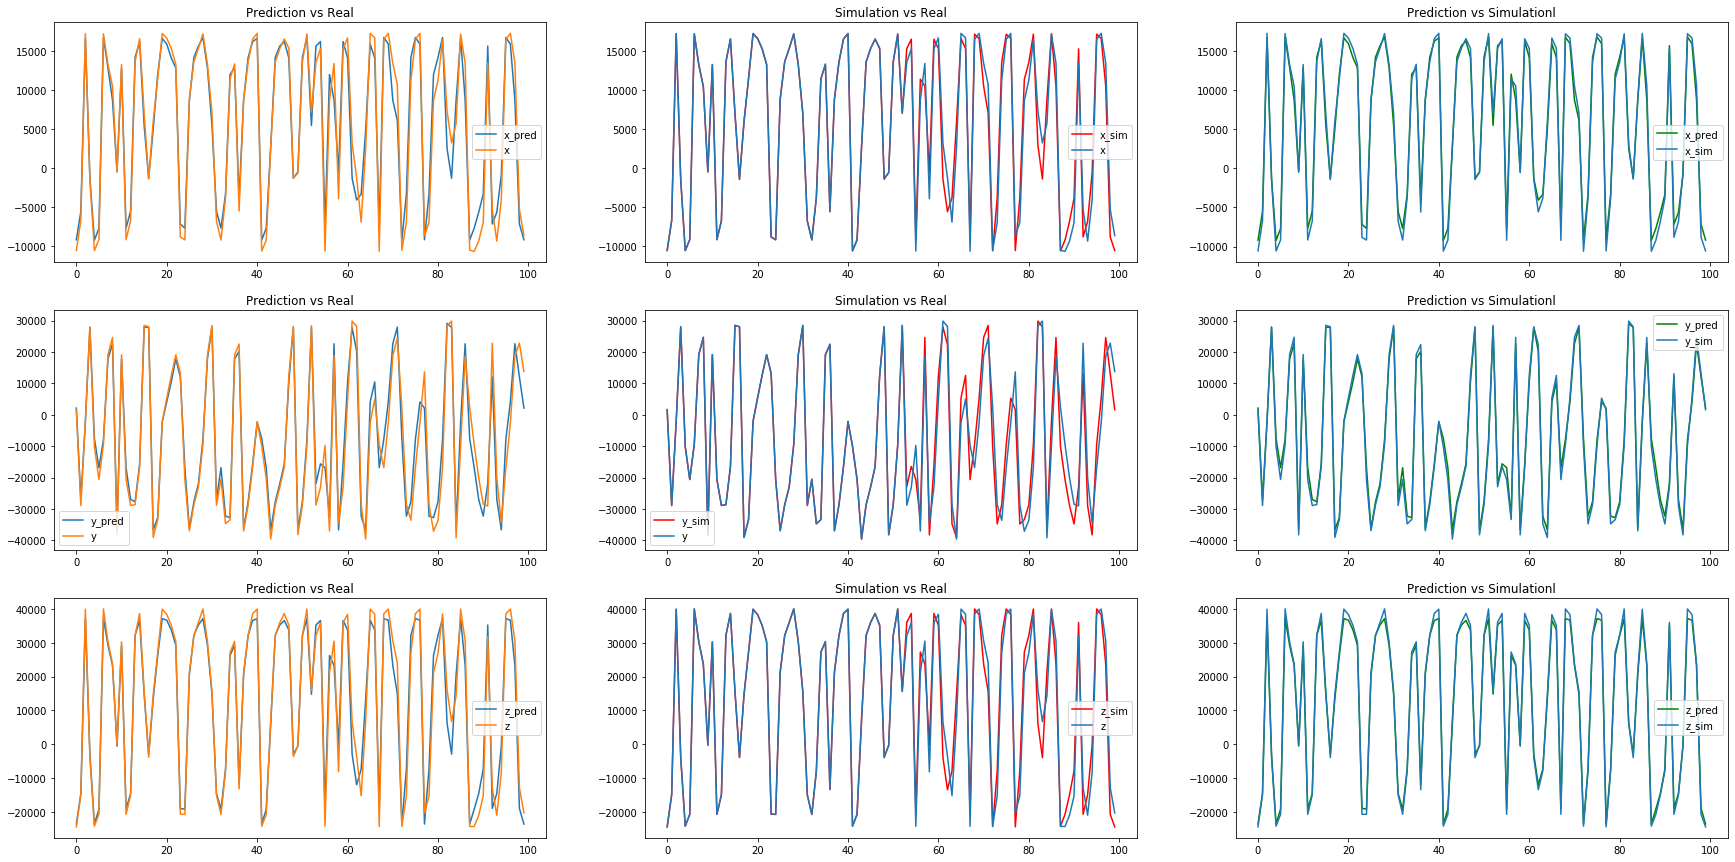

In [19]:
# figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(3, 3, figsize=(30, 15))
c=0
for i in label:
    axs[c, 0].plot('index',i+'_pred', data=test_mydata.iloc[0:100,:])
    axs[c, 0].plot('index',i, data=test_mydata.iloc[0:100,:])
    axs[c, 0].set_title('Prediction vs Real')
    axs[c, 0].legend()
    axs[c, 1].plot('index',i+'_sim', data=test_mydata.iloc[0:100,:], color='red')
    axs[c, 1].plot('index',i, data=test_mydata.iloc[0:100,:])
    axs[c, 1].set_title('Simulation vs Real')
    axs[c, 1].legend()
    axs[c, 2].plot('index',i+'_pred', data=test_mydata.iloc[0:100,:],  color='green')
    axs[c, 2].plot('index',i+'_sim', data=test_mydata.iloc[0:100,:])
    axs[c, 2].set_title('Prediction vs Simulationl')
    axs[c, 2].legend()  
    c+=1

#     for ax in axs.flat:
#         ax.set(xlabel='x-label', ylabel='y-label')

#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

In [20]:
test_mydata.head()

,x,y,z,x_sim,y_sim,z_sim,x_pred,y_pred,z_pred,index
id,,,,,,,,,,
1,-10567.672384,1619.746066,-24451.813271,-10555.500066,1649.289367,-24473.089556,-9179.145508,2141.341309,-23610.376953,0
4,-6719.092336,-28929.061629,-14938.907967,-6729.358857,-28902.271436,-14992.399986,-5515.943359,-26971.740234,-14579.615234,1
15,17281.246143,-2011.121378,39970.739873,17241.395285,-2016.770194,39958.759155,16667.380859,-2269.352051,37176.863281,2
22,-1447.724638,28032.228987,-3918.192838,-1461.093061,28026.085525,-3959.767549,-1289.227295,27842.541016,-2920.511963,3
26,-10583.521489,-10145.003880,-24243.775722,-10574.016380,-10147.909472,-24270.149411,-9233.385742,-7560.209473,-23610.376953,4


In [24]:
def smape(satellite_predicted_values, satellite_true_values):
    return np.mean(np.abs((satellite_predicted_values - satellite_true_values)/(np.abs(satellite_predicted_values) + np.abs(satellite_true_values))))

In [25]:
for i in label:
    print('smape real vs sim : %f, smape real vs prediction : %f ' %(smape(test_mydata[i], test_mydata[i+'_sim']), smape(test_mydata[i], test_mydata[i+'_pred'])))

smape real vs sim : 0.182732, smape real vs prediction : 0.201634 
smape real vs sim : 0.186034, smape real vs prediction : 0.208624 
smape real vs sim : 0.183391, smape real vs prediction : 0.217725 


In [26]:
for i in ['_sim', '_pred']:
    real=np.array(test_mydata[label])
    compare=np.array(test_mydata[[j+i for j in label]])
    print('smape real vs %s : %f' %(i, smape(real, compare)))

smape real vs _sim : 0.184052
smape real vs _pred : 0.209328


In [27]:
np.mean(np.array([[1,2],[2,3]]))

2.0